# Logistic Regression for Multiclass Classification 

This project uses a Logistic Regression Network for Multiclass image classification.
The Logistic Regression used is programmed from first principles.
The data is taken from Kaggle. The relevant URL is:https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge. The data consists of 48x48 pixel grayscale images of faces.The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The utils2 file contains all the necessary function that will be used such as activation functions(relu,tanh), indicator matrix function etc. 
In this project we use gradient descent to allow the algorithm to be trained.

## Conventions 

**X**  - Imput Matrix of Size NxD where N is the number of samples and D is the number of features

**Y** - Represents the true labels.

**W** - a matrix containing the weights(parameters). These parameters will be optimised during the algorithm's learning stage. W is of size D x K where K represents the number of output classes. 

**K** - represents the number of output classes.

**T** - represents the outputs of the algorithm i.e which class the algorithm has predicted.

**b** - bias term

> The logistic Regression used to perform multiclass classification on the above stated data. It uses gradient descent to train the logistic regression. It starts by defining the train method at first splits the data into training and testing sets. It then constructs indicator matrixes of both the training and testing true labels. It then initialises W and b. W is initialised from a Gausian Distribution with mean equal to 0 and variance equal to 1. It then applies gradient descent to each sample. The equations for the gradient descent step can be calculated by calculating the derivative of the cost function with respect to the weights and making it equal 0. After this the propagate method is used to create a matrix with the probabilities for each class.
During the last step, for every 10th sample we  check the cost and error. If the error is less than the lowest error calculated so far, the error is saved in the variable - final_err. Finally the best final error is printed. The intermediate cost, error and epoch is also printed every 10th sample to ensure that the error and the cost are constantly decreasing. 

### Creating a Class 

In [1]:
#Inputs
from utils2 import reLu,error_rate_mean,indicator_mat_conv,cost,getData,softmax
import numpy as np
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt

class LregMultiClass(object):
    def __init__(self):
        pass 
    
    def train(self, X, Y, learning_rate=10e-8, reg_param=10e-12, epochs=10000, show_fig=False):
        X, Y = shuffle(X, Y)
        Xtest, Ytest = X[-1000:], Y[-1000:]#spliting the data to form a test set
        Ttest = indicator_mat_conv(Ytest)#constructing an indicator matrix essentially performing one-hot encoding on the true labels
        Xtrain, Ytrain = X[:-1000], Y[:-1000]#spliting the data form a train set

        N, D = X.shape
        K = len(set(Ytrain))#K unique classes
        Ttrain = indicator_mat_conv(Ytrain)#indicator matrix for the testing 
        self.W = np.random.randn(D, K) / np.sqrt(D)#initialise W
        self.b = np.zeros(K)#initialise b 

        cost_arr = []#a list to hold all the costs
        final_err = 1
        for i in range(epochs):
            # Applying the propagate method
            prob_givenY = self.propagate(Xtrain)

            #Performing gradient descent
            self.W -= learning_rate*(Xtrain.T.dot(prob_givenY - Ttrain) + reg_param*self.W)
            self.b -= learning_rate*((prob_givenY - Ttrain).sum(axis=0) + reg_param*self.b)
            
            # Calculating the cost and the error
            if i % 10 == 0:
                prob_Ytest = self.propagate(Xtest)
                cost_per_iter = cost(Ttest, prob_Ytest)
                cost_arr.append(cost_per_iter)
                err_per_iter = error_rate_mean(Ytest, np.argmax(prob_Ytest, axis=1))
                print("i:", i, "cost:", cost_per_iter, "error:", err_per_iter)
                if err_per_iter < final_err:
                    final_err = err_per_iter
        print("best_validation_error:", final_err)

        if show_fig:
            plt.plot(cost_arr)
            plt.show()

    # Applies softmax as an activation function to the dot product between X and W and adds the bias term
    def propagate(self, X):
        return softmax(X.dot(self.W) + self.b)
    # Uses the argmax to find the class with the highest probability.
    def pred(self, X):
        prob_givenY = self.propagate(X)
        return np.argmax(prob_givenY, axis=1)
    #Calculates the accuracy of the algorithm.
    def score(self, X, Y):
        prediction = self.pred(X)
        return 1 - error_rate_mean(Y, prediction)
    

('0:', 4953, '1:', 547, '2:', 5121, '3:', 8989, '4:', 6077, '5:', 4002, '6:', 6198, '7:', 0, '8:', 0, '9:', 35887)


### Class Initialisation

('i:', 0, 'cost:', 1969.8534142114081, 'error:', 0.83299999999999996)
('i:', 10, 'cost:', 1818.1374698719524, 'error:', 0.73399999999999999)
('i:', 20, 'cost:', 1809.2862304398166, 'error:', 0.72999999999999998)
('i:', 30, 'cost:', 1804.5335689687308, 'error:', 0.72999999999999998)
('i:', 40, 'cost:', 1801.0659465445015, 'error:', 0.73199999999999998)
('i:', 50, 'cost:', 1798.1816221557283, 'error:', 0.73199999999999998)
('i:', 60, 'cost:', 1795.6291550672317, 'error:', 0.73199999999999998)
('i:', 70, 'cost:', 1793.2956370280322, 'error:', 0.73199999999999998)
('i:', 80, 'cost:', 1791.1212833249047, 'error:', 0.72999999999999998)
('i:', 90, 'cost:', 1789.0702725844287, 'error:', 0.72599999999999998)
('i:', 100, 'cost:', 1787.1190864222101, 'error:', 0.72599999999999998)
('i:', 110, 'cost:', 1785.2512307050895, 'error:', 0.72599999999999998)
('i:', 120, 'cost:', 1783.4545816355771, 'error:', 0.72399999999999998)
('i:', 130, 'cost:', 1781.7199230776523, 'error:', 0.72599999999999998)
('i

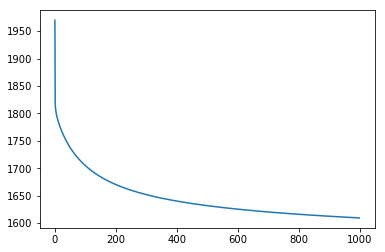

0.379970462842


In [2]:
def main():
    X,Y = getData()
        
    model = LregMultiClass()
    model.train(X, Y, show_fig=True)
    print(model.score(X, Y))
        
if __name__ == '__main__':
    main()

> After 10000 iterations the best validation error is found to be 0.602 which is higher than what validation error produced by the Neural Network in the Image Classification  - Neural Network for Multiclass Classification project.
From the above plot, it can be observed that the error and the cost are decreasing.